In [2]:
import numpy as np
import json

In [3]:
with open('single_ppo/rewards.json') as f:
    rewards = json.load(f)

with open('single_ppo2/rewards.json') as f:
    rewards2 = json.load(f)
    
with open('ma_ppo2/rewards.json') as f:
    rewards_ma = json.load(f)

In [4]:
mean_rewards = np.zeros(1000)
min_rewards = np.zeros(1000)
max_rewards = np.zeros(1000)
episode_len_mean = np.zeros(1000)

for i in range(len(rewards)):
    mean_rewards[i] = json.loads(rewards[i])['episode_reward_mean']
    min_rewards [i] = json.loads(rewards[i])['episode_reward_min']
    max_rewards [i] = json.loads(rewards[i])['episode_reward_max']
    episode_len_mean[i] = json.loads(rewards[i])['episode_len_mean']
    

mean_rewards2 = np.zeros(1000)
min_rewards2 = np.zeros(1000)
max_rewards2 = np.zeros(1000)
episode_len_mean2 = np.zeros(1000)

for i in range(len(rewards2)):
    mean_rewards2[i] = json.loads(rewards2[i])['episode_reward_mean']
    min_rewards2 [i] = json.loads(rewards2[i])['episode_reward_min']
    max_rewards2 [i] = json.loads(rewards2[i])['episode_reward_max']
    episode_len_mean2[i] = json.loads(rewards2[i])['episode_len_mean']
    
    
mean_rewards_ma = np.zeros(1000)
min_rewards_ma = np.zeros(1000)
max_rewards_ma = np.zeros(1000)
episode_len_mean_ma = np.zeros(1000)

for i in range(len(rewards_ma)):
    mean_rewards_ma[i] = json.loads(rewards_ma[i])['episode_reward_mean']
    min_rewards_ma [i] = json.loads(rewards_ma[i])['episode_reward_min']
    max_rewards_ma [i] = json.loads(rewards_ma[i])['episode_reward_max']
    episode_len_mean_ma[i] = json.loads(rewards_ma[i])['episode_len_mean']

In [5]:
#results = {
#    'mean_rewards' :mean_rewards2,
#    'min_rewards' :min_rewards2,
#    'max_rewards' :max_rewards2,
#    'episode_len_mean' :episode_len_mean2,
#}
#np.save('results_ppo(3layers).npy', arr=results)

In [6]:
results_3layers = np.load('results_ppo(3layers).npy', allow_pickle=True)[None][0]

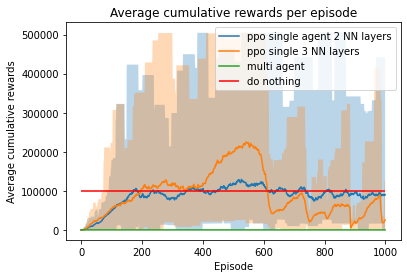

In [12]:
import matplotlib.pyplot as plt
#r = np.random.normal(128, 1, 1000)
plt.plot(mean_rewards, label='ppo single agent 2 NN layers')
#plt.plot(mean_rewards2, label='single agent2')
plt.plot(results_3layers['mean_rewards'], label='ppo single 3 NN layers')
plt.plot(mean_rewards_ma/2, label='multi agent')
#plt.plot(r/2, label='multi agent')
plt.fill_between(range(1000), min_rewards, max_rewards, alpha=0.3)
plt.fill_between(range(1000), results_3layers['min_rewards'], results_3layers['max_rewards'], alpha=0.3)
plt.fill_between(range(500), min_rewards_ma[:500]/2, max_rewards_ma[:500]/2, alpha=0.3)
plt.hlines(100_000, 0, 1000, colors='red', label='do nothing')
#plt.fill_between(range(1000), min_rewards2, max_rewards2, alpha=0.3)
plt.title('Average cumulative rewards per episode')
plt.xlabel('Episode')
plt.ylabel('Average cumulative rewards')
plt.legend()
plt.savefig('rewards_ppo')

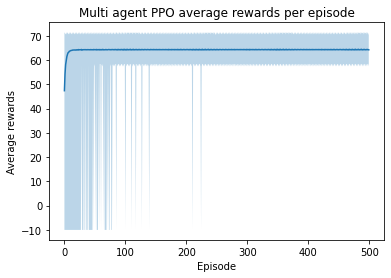

In [34]:
plt.plot(mean_rewards_ma[:500]/2)
plt.fill_between(range(500), min_rewards_ma[:500]/2, max_rewards_ma[:500]/2, alpha=0.3)
plt.title("Multi agent PPO average rewards per episode")
plt.xlabel("Episode")
plt.ylabel("Average rewards")
plt.savefig("ppo_ma_zoom")

In [44]:
mean_rewards[83]

38007.2935887146